# Coding Temple's Data Analytics Program:
---
## Python for DA: Machine Learning Assignment

For your assignment today, you will look through the [UCI Irvine ML Repository](https://archive.ics.uci.edu/datasets) to find a dataset that you can build a model on. Your workflow should look something like:

- Import any necessary libraries
- Load in the data
- Clean/Tidy the Data
- Explore the data:
    - Gather all summary statistics
    - Visualize your data and your target
    - Identify any relationships between your target and the feature matrix
    - Loop back through and continue cleaning data/feature engineering as needed
- Split the data
- Establish a baseline model
- Create model
- Establish model accuracy
- Hypertune your model
- Communicate your results

The model, data, and methods you use are all completely up to you for this assignment! Ensure you label your notebook with markdown cells and proper comments

In [180]:
from category_encoders import OneHotEncoder, OrdinalEncoder
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error, roc_auc_score
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier, XGBRegressor
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


Import and clean.

In [198]:
#Importing the data
def framecleaner(url):
    df= pd.read_csv(url,sep=';')
    df.columns = df.columns.str.lower()
    df.columns = df.columns.str.strip()
    df.columns = df.columns.map(lambda x : x.replace('.', '_').replace(' ', '_')) 
    df= df.replace(',','',regex=True)
    return df

#import string to frame cleaner for cleaner frames ya feel
str = r'C:\Users\Logan\Documents\GitHub\bootcamp\week_4\data.csv'
df_full = framecleaner(str)
#df_snap = df_snap.apply(pd.to_numeric,errors='coerce')

#check for nulls and data types.
df_full.info()
#checking for nans , looks like none!
display(sum(df_full.isna().sum()))

'''
df_full=df_full.drop(columns='romantic')
df_full=df_full.drop(columns='mjob')
df_full=df_full.drop(columns='fjob')
df_full=df_full.drop(columns='reason')
df_full=df_full.drop(columns='guardian')
df_full=df_full.drop(columns='nursery')
df_full=df_full.drop(columns='medu')
df_full=df_full.drop(columns='fedu')
df_full=df_full.drop(columns='traveltime')
df_full=df_full.drop(columns='famsup')
df_full=df_full.drop(columns='dalc')
df_full=df_full.drop(columns='walc')
df_full=df_full.drop(columns='famrel')
df_full=df_full.drop(columns='freetime')
df_full=df_full.drop(columns='goout')
'''
#df_full=df_full[['absences','g1','g2','g3']]
df_full.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   marital_status                                  4424 non-null   int64  
 1   application_mode                                4424 non-null   int64  
 2   application_order                               4424 non-null   int64  
 3   course                                          4424 non-null   int64  
 4   daytime/evening_attendance                      4424 non-null   int64  
 5   previous_qualification                          4424 non-null   int64  
 6   previous_qualification_(grade)                  4424 non-null   float64
 7   nacionality                                     4424 non-null   int64  
 8   mother's_qualification                          4424 non-null   int64  
 9   father's_qualification                   

0

,marital_status,application_mode,application_order,course,daytime/evening_attendance,previous_qualification,previous_qualification_(grade),nacionality,mother's_qualification,father's_qualification,...,curricular_units_2nd_sem_(credited),curricular_units_2nd_sem_(enrolled),curricular_units_2nd_sem_(evaluations),curricular_units_2nd_sem_(approved),curricular_units_2nd_sem_(grade),curricular_units_2nd_sem_(without_evaluations),unemployment_rate,inflation_rate,gdp,target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [182]:
'''
# Attributes for both student-mat.csv (Math course) and student-por.csv (Portuguese language course) datasets:
1 school - student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira) :
2 sex - student's sex (binary: 'F' - female or 'M' - male)
3 age - student's age (numeric: from 15 to 22)
4 address - student's home address type (binary: 'U' - urban or 'R' - rural)
5 famsize - family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)

6 Pstatus - parent's cohabitation status (binary: 'T' - living together or 'A' - apart)
7 Medu - mother's education (numeric: 0 - none,  1 - primary education (4th grade), 2 â€“ 5th to 9th grade, 3 â€“ secondary education or 4 â€“ higher education)
8 Fedu - father's education (numeric: 0 - none,  1 - primary education (4th grade), 2 â€“ 5th to 9th grade, 3 â€“ secondary education or 4 â€“ higher education)
9 Mjob - mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
    ->Removed due to the many categories to create noise 
10 Fjob - father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
    ->Removed due to the many categories to create noise 
11 reason - reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')
    ->Removed due to the many categories to create noise 
12 guardian - student's guardian (nominal: 'mother', 'father' or 'other')
13 traveltime - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)
14 studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)
15 failures - number of past class failures (numeric: n if 1<=n<3, else 4)
16 schoolsup - extra educational support (binary: yes or no)
17 famsup - family educational support (binary: yes or no)
18 paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)
19 activities - extra-curricular activities (binary: yes or no)
20 nursery - attended nursery school (binary: yes or no)
21 higher - wants to take higher education (binary: yes or no)
22 internet - Internet access at home (binary: yes or no)
23 romantic - with a romantic relationship (binary: yes or no)
    ->I personally do not feel this was an important field.
24 famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)
25 freetime - free time after school (numeric: from 1 - very low to 5 - very high)
26 goout - going out with friends (numeric: from 1 - very low to 5 - very high)
27 Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)
28 Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)
29 health - current health status (numeric: from 1 - very bad to 5 - very good)
30 absences - number of school absences (numeric: from 0 to 93)

# these grades are related with the course subject, Math or Portuguese:
31 G1 - first period grade (numeric: from 0 to 20)
31 G2 - second period grade (numeric: from 0 to 20)
32 G3 - final grade (numeric: from 0 to 20, output target)
'''

"\n# Attributes for both student-mat.csv (Math course) and student-por.csv (Portuguese language course) datasets:\n1 school - student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira) :\n2 sex - student's sex (binary: 'F' - female or 'M' - male)\n3 age - student's age (numeric: from 15 to 22)\n4 address - student's home address type (binary: 'U' - urban or 'R' - rural)\n5 famsize - family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)\n\n6 Pstatus - parent's cohabitation status (binary: 'T' - living together or 'A' - apart)\n7 Medu - mother's education (numeric: 0 - none,  1 - primary education (4th grade), 2 â€“ 5th to 9th grade, 3 â€“ secondary education or 4 â€“ higher education)\n8 Fedu - father's education (numeric: 0 - none,  1 - primary education (4th grade), 2 â€“ 5th to 9th grade, 3 â€“ secondary education or 4 â€“ higher education)\n9 Mjob - mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrati

c:\Users\Logan\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


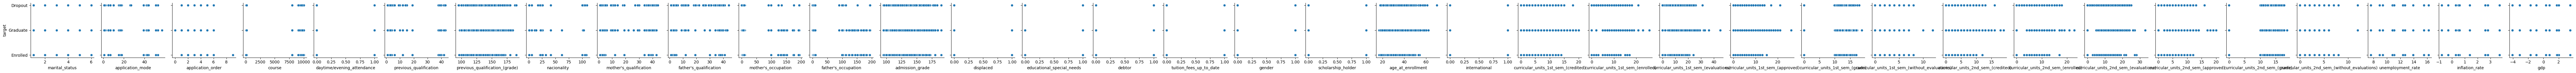

In [193]:
sns.pairplot(df_full, y_vars=['target'])
df=df_full


Plot the G3 data to see the spread.

<Axes: xlabel='g3', ylabel='Count'>

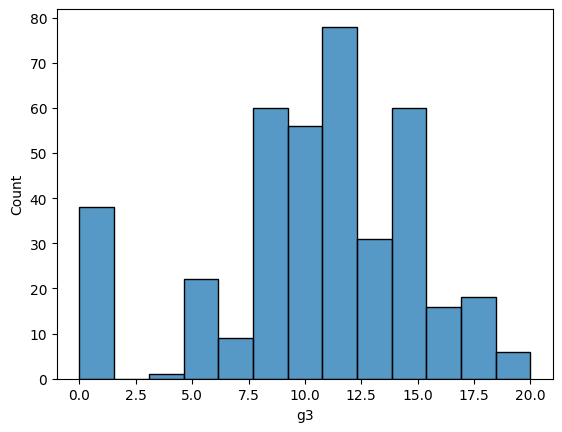

In [184]:
sns.histplot(data=df, x='g3')
#lets check the distribution


In [203]:
#SPLIT MY DATA
target = 'target'
#I am choosing g3 as my target vector because this is the final math score.
#I checked G1,G2 are not a direct sum nor average for g3. 
#SO we can keep them as indicators.

#Moving DF['g3'] into the target vector variable
X = df.drop(columns=target)
y = df[target]

#Split the data into a training and testing set, using sklearn
x_train, x_test, y_train, y_test = train_test_split(X,y, train_size=.9, random_state=42)

# View our testing data
display(x_test)
print(y_test)

# Assert statement to double-check our work:
assert len(x_train) + len(x_test) == len(X), 'You did not separate the data properly'

,marital_status,application_mode,application_order,course,daytime/evening_attendance,previous_qualification,previous_qualification_(grade),nacionality,mother's_qualification,father's_qualification,...,curricular_units_1st_sem_(without_evaluations),curricular_units_2nd_sem_(credited),curricular_units_2nd_sem_(enrolled),curricular_units_2nd_sem_(evaluations),curricular_units_2nd_sem_(approved),curricular_units_2nd_sem_(grade),curricular_units_2nd_sem_(without_evaluations),unemployment_rate,inflation_rate,gdp
1255,4,39,1,9130,1,1,133.1,1,3,1,...,0,0,6,16,1,10.000000,0,11.1,0.6,2.02
3458,1,17,1,9238,1,1,125.0,1,4,3,...,0,0,6,8,6,12.142857,0,16.2,0.3,-0.92
3390,1,17,1,9853,1,1,133.0,1,38,38,...,0,0,7,7,7,12.285714,0,16.2,0.3,-0.92
1497,1,17,2,9670,1,1,110.0,1,1,1,...,0,0,6,8,5,13.000000,0,15.5,2.8,-4.06
1536,1,39,1,9500,1,1,130.0,1,37,19,...,0,0,7,14,0,0.000000,0,11.1,0.6,2.02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1129,5,17,5,9500,1,1,143.0,1,37,38,...,0,0,8,8,7,12.114286,0,12.7,3.7,-1.70
23,1,1,4,9670,1,1,125.0,1,1,38,...,0,0,6,7,6,12.285714,0,11.1,0.6,2.02
1502,2,39,1,9991,0,1,120.0,1,37,19,...,0,0,5,6,5,13.833333,0,10.8,1.4,1.74
188,1,39,1,9085,1,1,133.1,1,1,19,...,0,0,6,6,0,0.000000,0,8.9,1.4,3.51


1255     Dropout
3458    Graduate
3390    Graduate
1497    Graduate
1536     Dropout
          ...   
1129    Graduate
23      Graduate
1502    Graduate
188      Dropout
3113    Enrolled
Name: target, Length: 443, dtype: object


In [204]:
# Establish a baseline:
cl_base = round(max(df.target.value_counts(normalize=True)) *100,2)
print(f'Majority class is Graduated {cl_base}% of the time!')




Majority class is Graduated 49.93% of the time!


Creating Pipelines/Models

In [206]:
#---------------------Linear Regression---------------------

#since our dataset does not have null values we do not need an imputer

pipe_lr = make_pipeline(
    #We have categorical data
    OneHotEncoder(use_cat_names=True),
    #Logistcal regression placed here for lr model variable
    LogisticRegression(random_state=27)
)



# Fit the pipeline
pipe_lr.fit(x_train, y_train)

'''
#---------------------Decision Tree--------------------
pipe_dt = make_pipeline(
    OneHotEncoder(use_cat_names=True),
    DecisionTreeRegressor(random_state=27)
)

pipe_dt.fit(x_train, y_train)
'''

#---------------------Random_Forest------------------
model_rf = make_pipeline(
    OneHotEncoder(use_cat_names=True),
    RandomForestRegressor(random_state=27)
)

model_rf.fit(x_train, y_train)


#---------------------XGBoost---------------------------------------
model_xg = make_pipeline(
    OneHotEncoder(use_cat_names=True),
    XGBRegressor(random_state=27)
)

model_xg.fit(x_train, y_train)




c:\Users\Logan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


ValueError: could not convert string to float: 'Dropout'

Checking Metrics( Mean Absolute Error):

In [188]:
print('Linear Model Score:')
print(mean_absolute_error(y_train, model_lr.predict(x_train)))
print(mean_absolute_error(y_test, model_lr.predict(x_test)))
print('------------------------------------------------------')
print('Decision Tree Scores:')
print(mean_absolute_error(y_train, pipe_dt.predict(x_train)))
print(mean_absolute_error(y_test, pipe_dt.predict(x_test)))
print('------------------------------------------------------')
print('Random Forest Score:')
print(mean_absolute_error(y_train, model_rf.predict(x_train)))
print(mean_absolute_error(y_test, model_rf.predict(x_test)))
print('---------------------------------------')
print('XGBoost Score:')
print(mean_absolute_error(y_train, model_xg.predict(x_train)))
print(mean_absolute_error(y_test, model_xg.predict(x_test)))



Linear Model Score:
1.1460904740143547
1.55799741458143
------------------------------------------------------
Decision Tree Scores:
0.0
1.575
------------------------------------------------------
Random Forest Score:
0.3304225352112676
1.33325
---------------------------------------
XGBoost Score:
0.010245716182882307
1.4134634431451558


Checking Metrics(R2 Scores)

In [189]:
print('Linear Model Score:')
print(r2_score(y_train, model_lr.predict(x_train)))
print(r2_score(y_test, model_lr.predict(x_test)))
print('---------------------------------------')
print('Decision Tree Scores:')
print(r2_score(y_train, pipe_dt.predict(x_train)))
print(r2_score(y_test, pipe_dt.predict(x_test)))
print('-------------------------------------------')
print('Random Forest Score:')
print(r2_score(y_train, model_rf.predict(x_train)))
print(r2_score(y_test, model_rf.predict(x_test)))
print('---------------------------------------')
print('XGBoost Score:')
print(r2_score(y_train, model_xg.predict(x_train)))
print(r2_score(y_test, model_xg.predict(x_test)))

Linear Model Score:
0.8464793281710687
0.7367181625782098
---------------------------------------
Decision Tree Scores:
1.0
0.652754929007112
-------------------------------------------
Random Forest Score:
0.9864490738663353
0.7784336513882211
---------------------------------------
XGBoost Score:
0.9999810893904378
0.7771924093553051
